In [1]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions

In [2]:
df = pd.DataFrame()

In [3]:
df['X1'] = [1,2,3,4,5,6,6,7,9,9]
df['X2'] = [5,3,6,8,1,9,5,8,9,2]
df['label'] = [1,1,0,1,0,1,0,1,0,0]

In [4]:
df

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


<Axes: xlabel='X1', ylabel='X2'>

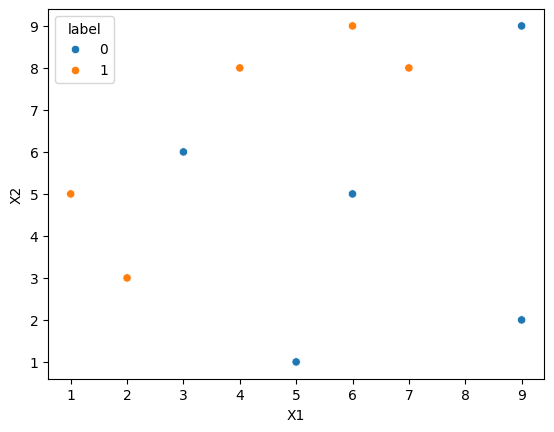

In [5]:
import seaborn as sns
sns.scatterplot(x=df['X1'],y=df['X2'],hue=df['label'])

In [6]:
df['weights']=1/df.shape[0]

In [7]:
df

,X1,X2,label,weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
dt1=DecisionTreeClassifier(max_depth=1)

In [10]:
x=df.iloc[:,0:2].values
y=df.iloc[:,2].values

In [11]:
x

array([[1, 5],
       [2, 3],
       [3, 6],
       [4, 8],
       [5, 1],
       [6, 9],
       [6, 5],
       [7, 8],
       [9, 9],
       [9, 2]], dtype=int64)

In [12]:
y

array([1, 1, 0, 1, 0, 1, 0, 1, 0, 0], dtype=int64)

In [13]:
dt1.fit(x,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[1] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [3, 5]')]

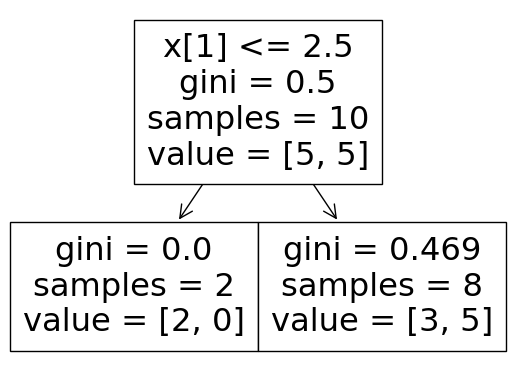

In [14]:
from sklearn.tree import plot_tree
plot_tree(dt1)

In [27]:
df['y_pred']=dt1.predict(x)

In [28]:
df['y_pred']

0    1
1    1
2    1
3    1
4    0
5    1
6    1
7    1
8    1
9    0
Name: y_pred, dtype: int64

<Axes: >

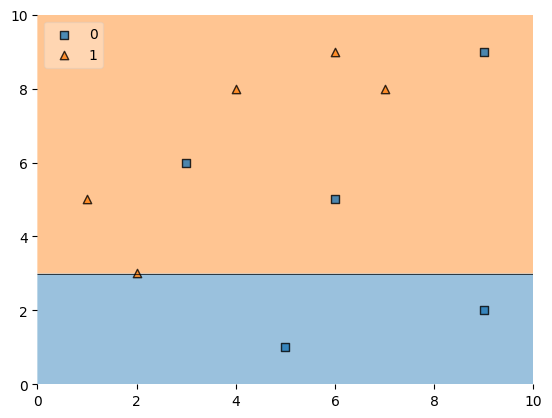

In [29]:
plot_decision_regions(x, y, clf=dt1, legend=2)

In [30]:
def calculate_model_weight(error):
    return 0.5*np.log((1-error)/(error))

In [31]:
alpha1=calculate_model_weight(0.3)
alpha1

0.42364893019360184

In [32]:
def update_row_weights(row,alpha=0.423):
    if row['label']==row['y_pred']:
        return row['weights']*np.exp(-alpha)
    else:
        return row['weights']*np.exp(alpha)

In [33]:
df['updated_weights']=df.apply(update_row_weights,axis=1)

In [34]:
df

,X1,X2,label,weights,y_pred,updated_weights
0,1,5,1,0.1,1,0.065508
1,2,3,1,0.1,1,0.065508
2,3,6,0,0.1,1,0.152653
3,4,8,1,0.1,1,0.065508
4,5,1,0,0.1,0,0.065508
5,6,9,1,0.1,1,0.065508
6,6,5,0,0.1,1,0.152653
7,7,8,1,0.1,1,0.065508
8,9,9,0,0.1,1,0.152653
9,9,2,0,0.1,0,0.065508


In [35]:
df['normalized_wt']=df['updated_weights']/df['updated_weights'].sum()

In [36]:
df

,X1,X2,label,weights,y_pred,updated_weights,normalized_wt
0,1,5,1,0.1,1,0.065508,0.071475
1,2,3,1,0.1,1,0.065508,0.071475
2,3,6,0,0.1,1,0.152653,0.166559
3,4,8,1,0.1,1,0.065508,0.071475
4,5,1,0,0.1,0,0.065508,0.071475
5,6,9,1,0.1,1,0.065508,0.071475
6,6,5,0,0.1,1,0.152653,0.166559
7,7,8,1,0.1,1,0.065508,0.071475
8,9,9,0,0.1,1,0.152653,0.166559
9,9,2,0,0.1,0,0.065508,0.071475


In [37]:
df['cumsum_upper']=np.cumsum(df['normalized_wt'])

In [38]:
df

,X1,X2,label,weights,y_pred,updated_weights,normalized_wt,cumsum_upper
0,1,5,1,0.1,1,0.065508,0.071475,0.071475
1,2,3,1,0.1,1,0.065508,0.071475,0.142950
2,3,6,0,0.1,1,0.152653,0.166559,0.309508
3,4,8,1,0.1,1,0.065508,0.071475,0.380983
4,5,1,0,0.1,0,0.065508,0.071475,0.452458
5,6,9,1,0.1,1,0.065508,0.071475,0.523933
6,6,5,0,0.1,1,0.152653,0.166559,0.690492
7,7,8,1,0.1,1,0.065508,0.071475,0.761967
8,9,9,0,0.1,1,0.152653,0.166559,0.928525
9,9,2,0,0.1,0,0.065508,0.071475,1.000000


In [41]:
df['cumsum_lower']=df['cumsum_upper']-df['normalized_wt']

In [42]:
df

,X1,X2,label,weights,y_pred,updated_weights,normalized_wt,cumsum_upper,cumsum_lower
0,1,5,1,0.1,1,0.065508,0.071475,0.071475,0.000000
1,2,3,1,0.1,1,0.065508,0.071475,0.142950,0.071475
2,3,6,0,0.1,1,0.152653,0.166559,0.309508,0.142950
3,4,8,1,0.1,1,0.065508,0.071475,0.380983,0.309508
4,5,1,0,0.1,0,0.065508,0.071475,0.452458,0.380983
5,6,9,1,0.1,1,0.065508,0.071475,0.523933,0.452458
6,6,5,0,0.1,1,0.152653,0.166559,0.690492,0.523933
7,7,8,1,0.1,1,0.065508,0.071475,0.761967,0.690492
8,9,9,0,0.1,1,0.152653,0.166559,0.928525,0.761967
9,9,2,0,0.1,0,0.065508,0.071475,1.000000,0.928525


In [43]:

df[['X1','X2','label','weights','y_pred','updated_weights','cumsum_lower','cumsum_upper']]

,X1,X2,label,weights,y_pred,updated_weights,cumsum_lower,cumsum_upper
0,1,5,1,0.1,1,0.065508,0.000000,0.071475
1,2,3,1,0.1,1,0.065508,0.071475,0.142950
2,3,6,0,0.1,1,0.152653,0.142950,0.309508
3,4,8,1,0.1,1,0.065508,0.309508,0.380983
4,5,1,0,0.1,0,0.065508,0.380983,0.452458
5,6,9,1,0.1,1,0.065508,0.452458,0.523933
6,6,5,0,0.1,1,0.152653,0.523933,0.690492
7,7,8,1,0.1,1,0.065508,0.690492,0.761967
8,9,9,0,0.1,1,0.152653,0.761967,0.928525
9,9,2,0,0.1,0,0.065508,0.928525,1.000000


In [44]:
def create_new_dataset(df):
    indices=[]
    for i in range(df.shape[0]):
        a=np.random.random()
        for index,row in df.iterrows():
            if row['cumsum_upper']>a and a > row['cumsum_lower']:
                indices.append(index)
    return indices

In [45]:
index_values=create_new_dataset(df)
index_values

[4, 0, 2, 1, 6, 2, 2, 8, 8, 2]

In [46]:
second_df=df.iloc[index_values,[0,1,2,3]]

In [47]:
second_df

,X1,X2,label,weights
4,5,1,0,0.1
0,1,5,1,0.1
2,3,6,0,0.1
1,2,3,1,0.1
6,6,5,0,0.1
2,3,6,0,0.1
2,3,6,0,0.1
8,9,9,0,0.1
8,9,9,0,0.1
2,3,6,0,0.1


In [48]:
dt2 = DecisionTreeClassifier(max_depth=1)

In [49]:
X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

In [50]:
dt2.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 2.5\ngini = 0.32\nsamples = 10\nvalue = [8, 2]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]')]

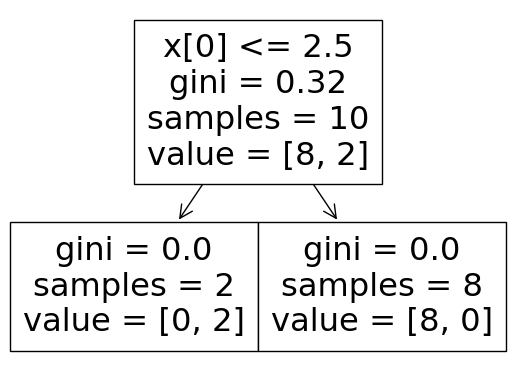

In [51]:
plot_tree(dt2)

<Axes: >

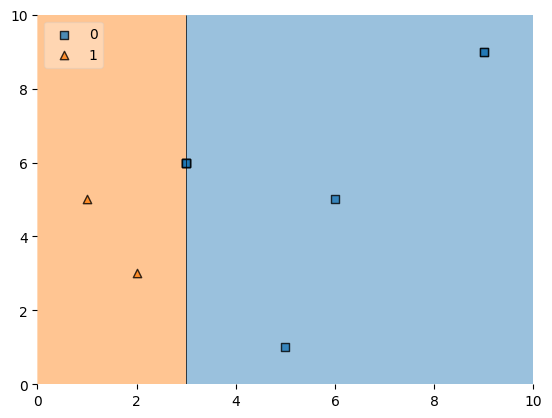

In [52]:
plot_decision_regions(X, y, clf=dt2, legend=2)

In [53]:
second_df['y_pred'] = dt2.predict(X)

In [54]:
alpha2 = calculate_model_weight(0.1)

In [55]:
alpha2

1.0986122886681098

In [56]:
def update_row_weights(row,alpha=1.09):
  if row['label'] == row['y_pred']:
    return row['weights'] * np.exp(-alpha)
  else:
    return row['weights'] * np.exp(alpha)

In [57]:
second_df['updated_weights'] = second_df.apply(update_row_weights,axis=1)

In [58]:

second_df['nomalized_weights'] = second_df['updated_weights']/second_df['updated_weights'].sum()

In [59]:
second_df['nomalized_weights'].sum()

0.9999999999999999

In [60]:
second_df['cumsum_upper'] = np.cumsum(second_df['nomalized_weights'])

In [61]:
second_df['cumsum_lower'] = second_df['cumsum_upper'] - second_df['nomalized_weights']

In [62]:
second_df[['X1','X2','label','weights','y_pred','nomalized_weights','cumsum_lower','cumsum_upper']]

,X1,X2,label,weights,y_pred,nomalized_weights,cumsum_lower,cumsum_upper
4,5,1,0,0.1,0,0.1,0.0,0.1
0,1,5,1,0.1,1,0.1,0.1,0.2
2,3,6,0,0.1,0,0.1,0.2,0.3
1,2,3,1,0.1,1,0.1,0.3,0.4
6,6,5,0,0.1,0,0.1,0.4,0.5
2,3,6,0,0.1,0,0.1,0.5,0.6
2,3,6,0,0.1,0,0.1,0.6,0.7
8,9,9,0,0.1,0,0.1,0.7,0.8
8,9,9,0,0.1,0,0.1,0.8,0.9
2,3,6,0,0.1,0,0.1,0.9,1.0


In [63]:
index_values = create_new_dataset(second_df)

In [64]:
third_df = second_df.iloc[index_values,[0,1,2,3]]

In [65]:
dt3 = DecisionTreeClassifier(max_depth=1)

X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

dt3.fit(X,y)

DecisionTreeClassifier(max_depth=1)

<Axes: >

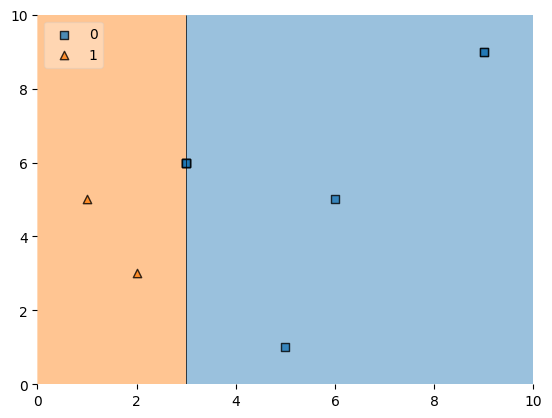

In [66]:
plot_decision_regions(X, y, clf=dt3, legend=2)

In [67]:
third_df['y_pred'] = dt3.predict(X)
     

In [68]:
third_df

,X1,X2,label,weights,y_pred
8,9,9,0,0.1,0
8,9,9,0,0.1,1
6,6,5,0,0.1,0
2,3,6,0,0.1,1
2,3,6,0,0.1,0
8,9,9,0,0.1,0
2,3,6,0,0.1,0
2,3,6,0,0.1,0
4,5,1,0,0.1,0
8,9,9,0,0.1,0


In [69]:
alpha3 = calculate_model_weight(0.7)
alpha3

-0.4236489301936017

In [72]:
print(alpha1,alpha2,alpha3)

0.42364893019360184 1.0986122886681098 -0.4236489301936017


In [73]:
query = np.array([1,5]).reshape(1,2)
dt1.predict(query)

array([1], dtype=int64)

In [74]:
dt2.predict(query)

array([1], dtype=int64)

In [75]:
dt3.predict(query)

array([1], dtype=int64)

In [76]:
alpha1*1 + alpha2*(1) + alpha3*(1)

1.09861228866811

In [77]:
np.sign(1.09)

1.0

In [78]:
query = np.array([9,9]).reshape(1,2)
dt1.predict(query)

array([1], dtype=int64)

In [79]:
dt2.predict(query)

array([0], dtype=int64)

In [80]:
dt3.predict(query)

array([0], dtype=int64)

In [81]:
alpha1*(1) + alpha2*(-1) + alpha3*(-1)

-0.2513144282809062

In [82]:
np.sign(-0.25)

-1.0